# How to run a SPARQL Query in Python
This is a jupyter notebook created in the context of the [tutorial "How to run a SPARQL query in python"](https://mimotext.github.io/MiMoTextBase_Tutorial/sparql_in_python.html) querying the MiMoTextBase. This is a  knowledge graph created by the team of the project "Mining and Modeling Text" (MiMoText, 2019-2023) located at the Center for Digital Humanities, university of Trier. For more information about the project see: https://mimotext.uni-trier.de/.

## Embedding SPARQL code in python
The first steps on how to access python code using the SPARQL-Query endpoint interface are described in steps 1-5 that can be found here: https://mimotext.github.io/MiMoTextBase_Tutorial/sparql_in_python.html
In this notebook we will now continue on how to embed and run the code copied from the endpoint interface.

### Get query result

In our [example query](https://tinyurl.com/yoa5z6ke) we ask for all literary works and their year of publication within the MiMoTextBase. Once you have run the query you can copy the generated code and copy it in your python script.


In [145]:
# pip install sparqlwrapper
# https://rdflib.github.io/sparqlwrapper/

import sys
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.mimotext.uni-trier.de/proxy/wdqs/bigdata/namespace/wdq/sparql"

query = """PREFIX mmdt: <http://data.mimotext.uni-trier.de/prop/direct/>
PREFIX mmd: <http://data.mimotext.uni-trier.de/entity/>

SELECT ?item ?itemLabel (YEAR(?publication_date) as ?publication_year)
WHERE {
  ?item mmdt:P2 mmd:Q2; 
        mmdt:P9 ?publication_date.
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}
ORDER BY ?publication_date"""


def get_results(endpoint_url, query):
    user_agent = "WDQS-example Python/%s.%s" % (sys.version_info[0], sys.version_info[1])
    # TODO adjust user agent; see https://w.wiki/CX6
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()


results = get_results(endpoint_url, query)

for result in results["results"]["bindings"]:
    print(result)

{'item': {'type': 'uri', 'value': 'http://data.mimotext.uni-trier.de/entity/Q1010'}, 'itemLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'Histoire de la félicité'}, 'publication_year': {'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'type': 'literal', 'value': '1751'}}
{'item': {'type': 'uri', 'value': 'http://data.mimotext.uni-trier.de/entity/Q1212'}, 'itemLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'Elixir du sentiment'}, 'publication_year': {'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'type': 'literal', 'value': '1751'}}
{'item': {'type': 'uri', 'value': 'http://data.mimotext.uni-trier.de/entity/Q1213'}, 'itemLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'Amours d’Alzidor et de Charisée'}, 'publication_year': {'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'type': 'literal', 'value': '1751'}}
{'item': {'type': 'uri', 'value': 'http://data.mimotext.uni-trier.de/entity/Q1214'}, 'itemLabel': {'xml:lang': 'en', 'type': 'literal',

The output we obtain is of datatype 'dictionary', which you can verify by running the next line of code:

In [146]:
print(type(results))

<class 'dict'>


### Retrieve desired output

The next step to convert the dictionary to a pandas DataFrame. For that you first need to import the pandas library. For converting the sparqlwrapper output using the method `json_normalize`, please take a closer look in the output generation of the first cell. You will notice that the desired results lie within `results["results"]["bindings"]`, which will be the parameter for the conversion.

In [147]:
import pandas as pd
data = pd.json_normalize(results["results"]["bindings"])
print(data)

     item.type                                      item.value  \
0          uri  http://data.mimotext.uni-trier.de/entity/Q1010   
1          uri  http://data.mimotext.uni-trier.de/entity/Q1212   
2          uri  http://data.mimotext.uni-trier.de/entity/Q1213   
3          uri  http://data.mimotext.uni-trier.de/entity/Q1214   
4          uri  http://data.mimotext.uni-trier.de/entity/Q1215   
...        ...                                             ...   
1758       uri  http://data.mimotext.uni-trier.de/entity/Q1207   
1759       uri  http://data.mimotext.uni-trier.de/entity/Q1208   
1760       uri  http://data.mimotext.uni-trier.de/entity/Q1209   
1761       uri  http://data.mimotext.uni-trier.de/entity/Q1210   
1762       uri  http://data.mimotext.uni-trier.de/entity/Q1211   

     itemLabel.xml:lang itemLabel.type                  itemLabel.value  \
0                    en        literal          Histoire de la félicité   
1                    en        literal              Elixi

As you can see in the DataFrame, it contains more data than the original query output, that is depending on the value: datatype, language information and the "value" that we want to contain in our final result. Therefore we will filter our DataFrame for those columns and rename them to the original column names: "item", "itemLabel" and "publication_year".

In [148]:
data = data[["item.value", "itemLabel.value", "publication_year.value"]].rename(columns={"item.value":"item", "itemLabel.value": "itemLabel", "publication_year.value":"publication_year"})
print(data)

                                                item  \
0     http://data.mimotext.uni-trier.de/entity/Q1010   
1     http://data.mimotext.uni-trier.de/entity/Q1212   
2     http://data.mimotext.uni-trier.de/entity/Q1213   
3     http://data.mimotext.uni-trier.de/entity/Q1214   
4     http://data.mimotext.uni-trier.de/entity/Q1215   
...                                              ...   
1758  http://data.mimotext.uni-trier.de/entity/Q1207   
1759  http://data.mimotext.uni-trier.de/entity/Q1208   
1760  http://data.mimotext.uni-trier.de/entity/Q1209   
1761  http://data.mimotext.uni-trier.de/entity/Q1210   
1762  http://data.mimotext.uni-trier.de/entity/Q1211   

                            itemLabel publication_year  
0             Histoire de la félicité             1751  
1                 Elixir du sentiment             1751  
2     Amours d’Alzidor et de Charisée             1751  
3            Le tombeau philosophique             1751  
4                              Rézéda     

Now you have everything you need, and can do what you like with the data. As we asked for all items and their publication year, we can create a timeline of novel creation within the years 1751-1800.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, '1751'),
  Text(1, 0, '1752'),
  Text(2, 0, '1753'),
  Text(3, 0, '1754'),
  Text(4, 0, '1755'),
  Text(5, 0, '1756'),
  Text(6, 0, '1757'),
  Text(7, 0, '1758'),
  Text(8, 0, '1759'),
  Text(9, 0, '1760'),
  Text(10, 0, '1761'),
  Text(11, 0, '1762'),
  Text(12, 0, '1763'),
  Text(13, 0, '1764'),
  Text(14, 0, '1765'),
  Text(15, 0, '1766'),
  Text(16, 0, '1767'),
  Text(17, 0, '1768'),
  Text(18, 0, '1769'),
  Text(19, 0, '1770'),
  Text(20, 0, '1771'),
  Text(21, 0, '1772'),
  Text(22, 0, '1773'),
  Text(23, 0, '1774'),
  Text(24, 0, '1775'),
  Text(25, 0, '1776'),
  Text(26, 0, '1777'),
  Text(27, 0, '1778'),
  Text(28, 0, '1779'),
  Text(29, 0, '1780'),
  Text(30, 0, '1781'),
  Text(31, 0, '1782'),
  Text(32, 0, '1783'),
  Text(33, 0, '1784'),
  

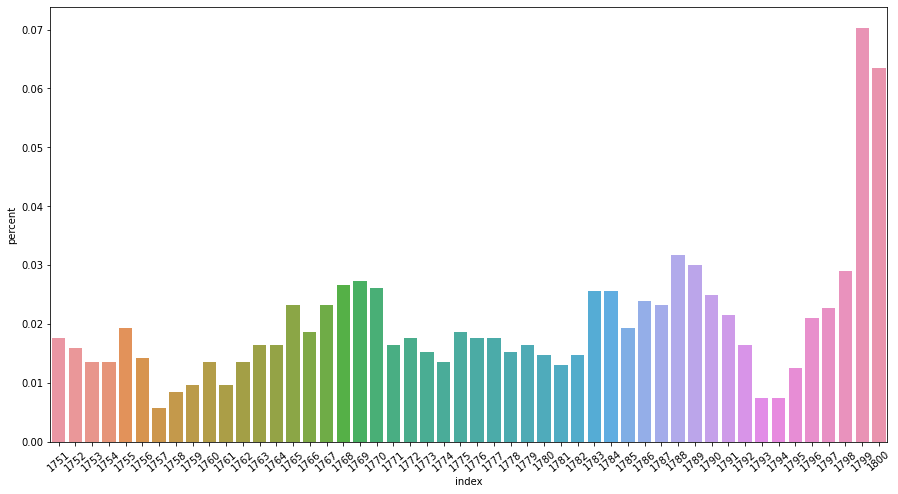

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,8))
d = data.publication_year.value_counts(normalize=True).reset_index(name="percent").sort_values(by="index")
sns.barplot(x=d["index"], y=d["percent"], order=d["index"])
plt.xticks(rotation=40)